In [ ]:
%matplotlib inline

In [3]:
# my imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Predicting Book Sales Success through Sentiment Analysis of Online Reviews

### Abstract

This project aims to asses the possibility of prediction of sales success of books based on sentiment analysis of online comments and reviews. By analyzing the sentiment expressed in user-generated content, we can gain insights into the public perception and potential market performance of various books. The project will utilize natural language processing (NLP) techniques to extract sentiment scores from comments and reviews, which will then be compared with existing sales data in attempt to predict future success of book sales. This approach can help publishers, authors, and retailers make data-driven decisions about marketing strategies, inventory management, and future publications.

1. Introduction

Understanding public sentiment can provide valuable insights into market trends and consumer preferences, aiding in strategic decision-making for stakeholders in the publishing industry. 
The objective of this project is to predict book sales success using sentiment analysis of online comments and reviews. The sentiment analysis will be performed on one of the following scikit-learn models: Logistic Regression, Naive Bayes, Support Vector Machines (SVM). All three models will be tested on an annotated book review dataset and the best performing will be chosen based on the following metrics: Precision, Recall, F1-Score, Support and Accuracy. The best performing model will be used to classify a second book review dataset based on the review's sentiment. The last step will compare the results of the sentiment predictions with the actual data represented by a list of best-selling books. Based on that comparison a conclusion will be made on the feasibility of a book success prediction based on a sample of book reviews.

In attempt to achieve this three separate datasets will be used: 
- Goodreads list of top 100 science fiction books of all time
- Amazon Top 100 Bestselling Book Reviews on Amazon for predicting
- List of best-selling books (Wikipedia)



2. Literature Review

A numerous attempts have been made in the past to link the results of a public opinion sentiments and the marketing success of a product. There have been multiple attempts on predicting the final box office success of a move based on the Rotten Tomato review scores or IMDB review ratings. With the vast influence in modern live of social media, efforts have been made to extract the sentiment (positive or negative) from customer reviews in X, Facebook and other social media, in order to predict future sales success.
In order to conduct the sentiment analysis, the following Natural Language Processing techniques are usually used: 
- Deep Learning Algorithms - mainly used on large datasets, Deep Learning Models, including artificial neural networks usually provide the best results for sentiment analysis. DLM's, however required a large amount of data to train in order to provide best accuracy. Some common deep-learning methods are:

    - Convolutional Neural Networks (CNN)
    - Recurrent Neural Networks (RNN)
    - Deep Belief Networks (DBN)
    - Long-Short Term Memory (LSTM)

- Supervised Machine Learning Algorithm - in supervised machine learning, the data is usually manually annotated before the preprocessing and is used for training the model. These models can be used to predict and classify future unannotated texts. Such methods are considered more accurate than the semi-supervised and unsupervised methods, however, the accuracy depends on the quality of the annotations. Some of the supervised machine learning algorithms are:
    - Support Vector Machines (SVM)
    - Naive Bayes (NB)
    - Logistic Regression (LogR)
    - Maximum Entropy (ME)
    - K-Nearest Neighbor (kNN)
    - Random Forest (RF)
    - Decision Trees (DT)
This work will focuse on Logistic Regression (LogR), Support Vector Machines (SVM) and Naive Bayes (NB) algorythms.

- Unsupervised and semi-supervised learning - the semi-supervised uses both labeled and unlabeled data and requires less human interaction. Unlabeled data assists in extracting language-invariant features, while labeled data is utilized as a classifier (6 Approaches for Sentiment Analysis Machine Learning in 2024.). 
Unsupervised learning uses lexicon-based approach using predifined dictionaries. The unsupervised approach does not need a trainig data and makes the predictions based on the word paring, popular terms and their positive, negative or neutral meanings. 

Both semi-supervised and unsupervised approaches predictions are heavily affected by the following language specifics:
- Negations - changing the entire meaning of the text, for example 'I wouldn't say: this is priceless' can sometimes be interpreted as a positive because of the heavy sentiment value of the word 'pricesless' and not considering that the emotional value is exactly the oposite. 
- Irony - the majority of machine learning algorithms are unable to distinquish irony.
- Alegory, analogy and metaphors - popular sayings like "Break a leg!" can be wrongly interpreted as a negative sentiment based on the heavy negative weight of the word 'to break' and completely miss the actual meaning of 'Good luck!'. 
- Bias - mainly affects unsupervised learning algorythms that use lexicon-based approach, which can be outdated or otherways biased.

3. Data Collection
For this project the data was aquired from relevant sources such as Amazon, Goodreads. The datasets used for training the model and for sentiment classification were gathered from Kaggle:
- Goodreads list of top 100 science fiction books of all time. Due to it's larger size and better sentiment distribution this dataset was chosen for training of the model.
- Amazon Top 100 Bestselling Book Reviews on Amazon for predicting of sales success.
Prior model training and sentyment analysis the following data preprocessing was applied: clean and preprocess the data, including text normalization, tokenization, and removal of irrelevant information. The preprocessing code and resulting files are listed in the Apendices section of this work.<br>
The data used for Sales analysis and success prediction check was scraped from Wikipedia:
- List of best-selling books (Wikipedia)

In [10]:
good_reads_df = pd.read_csv('data/cleaned_reviews_for_training_scifi.csv')

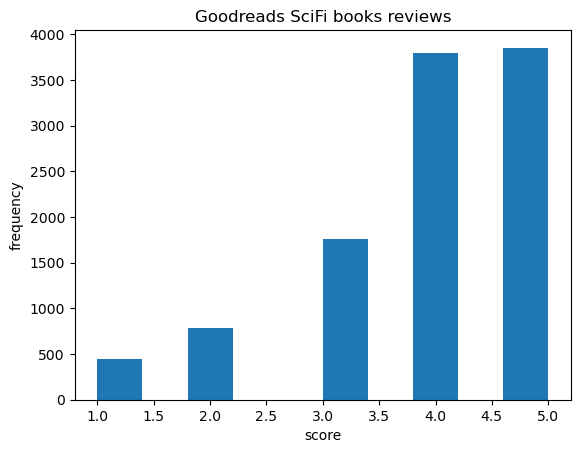

In [13]:
plt.hist(good_reads_df.stars_given)
plt.title('Goodreads SciFi books reviews')
plt.xlabel('score')
plt.ylabel('frequency')
plt.show()

In [12]:
amazon_df = pd.read_csv('data\cleaned_reviews_for_training_various.csv')

In [14]:
amazon_df.columns

Index(['#', 'book_name', 'reviewer_anonymous', 'reviewer_rating',
       'review_description', 'date', 'cleaned_review'],
      dtype='object')

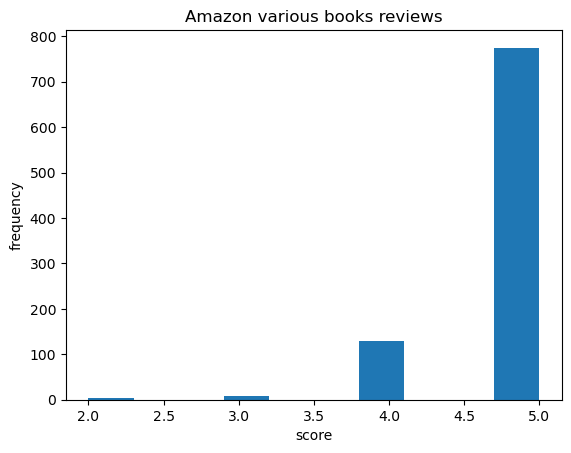

In [16]:
plt.hist(amazon_df.reviewer_rating)
plt.title('Amazon various books reviews')
plt.xlabel('score')
plt.ylabel('frequency')
plt.show()

4. Sentiment Analysis
In order to prepare the dataset for training the model and the dataset used for sales success prediction the following steps were taken using the Natural Language Toolkit library (NLTK):
    1. Normalization - Convert all text to lowercase to ensure uniformity.
    2. Removal of stop words - Remove common words (like "the", "is", "in") that don't carry    significant meaning.
    3. Lemmatization - Reduce words to their base form.
    4. Tokenization - Split the text into individual words (tokens).
    5. Removing punctuation - Remove punctuation marks from the text.
 <br>

Detailed description and execution of the data cleaning and preprocess can be found in the following Jupyter Notebook instances: 
- 'clean_and_tidy_reviews_for_scifi_books.ipynb'
- 'clean_and_tidy_reviews_for_various.ipynb'

The dataset used for the sales analysis was scraped using Beutiful Soup (BS4) library, the process of scraping, tidying and preprocessing can be found in the following Jupyter Notebook:
- 'web_scraper_bestsellers_books.ipynb'
    
Sentiment extraction was implemented on the SciFi detaset using three of the more popular Machine Learning models used in sentiment analysis: Logistic Regression (LogR), Support Vector Machines (SVM) and Naive Bayes (NB) algorythms. The process is described in the following Jupyter Notebook instances:     
- 'basic_sentiment_analysis_sklearn_logistic_regression.ipynb',   
- 'basic_sentiment_analysis_sklearn_naive_bayes.ipynb', 
- 'basic_sentiment_analysis_sklearn_svm.ipynb'

Feature Engineering and Transformation of sentiment scores and other textual features into numerical features suitable for predictive modeling was done using TF-IDF (Term Frequency - Inverse Document Frequency) method with scikit-learn method TfidfVectorizer().

The following metrics were considered while assesing the models performance:
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates fewer false positives.
- Recall: The ratio of correctly predicted positive observations to all actual positives. High recall indicates fewer false negatives.
- F1-Score: The weighted average of precision and recall. It provides a balance between precision and recall.
- Support: The number of true instances for each label.
- Accuracy: The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

### Logistic Regression score:
![Alt Text](media\logistic_regression_results_preprocessed.png)

### Naive Bayes score:
![Alt Text](media\naive_bayes_results_preprocessed.png)

### Support Vector Machine score:
![Alt Text](media\svm_results_preprocessed.png)

In [18]:
accuracy_score_dict = {'models': ['LR', 'NB', 'SVM'],
                        'accuracy_score': [0.7571764705882353, 0.723764705882353, 0.7811764705882352]}

acc_df = pd.DataFrame(accuracy_score_dict)

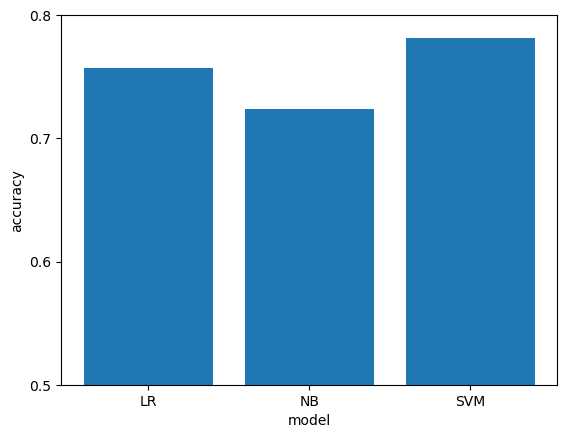

In [25]:
plt.bar(acc_df.models, acc_df.accuracy_score)
plt.xlabel('model')
plt.ylabel('accuracy')
plt.yticks([0.5, 0.6, 0.7, 0.8])
plt.ylim(0.5, 0.8)
plt.show()

During the selection process the time to train the model was taken into consideration as well:

In [27]:
time_to_train_seconds_dict = {'models': ['LR', 'NB', 'SVM'],
                        'ttt_seconds': [14.7, 7.1, 148]}

ttt_df = pd.DataFrame(time_to_train_seconds_dict)

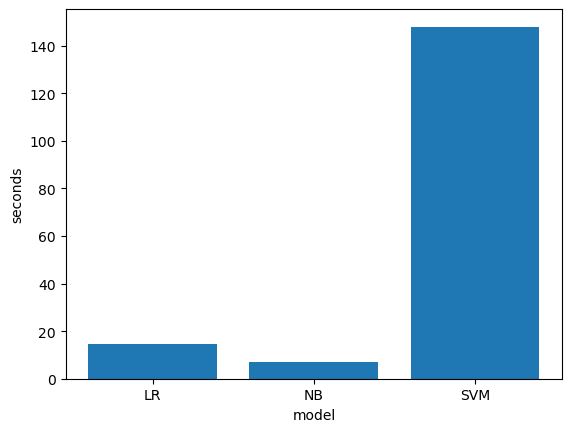

In [29]:
plt.bar(ttt_df.models, ttt_df.ttt_seconds)
plt.xlabel('model')
plt.ylabel('seconds')
plt.show()

Regardless of the significantly longer time to train, the SVM was chosen due to the better accuracy score and the relatively small training and prediction datasets. The training and data extraction for Sales analysis can be reviewed in the 'basic_sentiment_analysis_sklearn_svm.ipynb' Jupyter Notebook.

5. Sales Analysis and Sales Success Prediction

Sales analysis was made using the Wikipedia List of best-selling books. The data was scraped from the Wikipedia page using Beutiful Soup library. The reason for using Wikipedia was that this was the only comprehensive source of sales data available. This is discussed in more detail in 7. Discussion and 8. Conclusion sections of this paper. The sales analysis and prediction for sales success can be found in 'sales_analysis_and_prediction.ipynb' Jupyter Notebook.

6. Results and Analysis

- Model Performance: Present the results of the predictive models, comparing their accuracy and effectiveness in predicting sales success.
- Sentiment Impact: Analyze the impact of sentiment scores on the prediction accuracy and overall model performance.
- Insights and Trends: Discuss key findings, trends, and insights derived from the sentiment analysis and predictive modeling.

7. Discussion

- Limitations: Address potential limitations of the study, including data quality, model assumptions, and generalizability.
- Future Work: Suggest directions for future research, such as exploring additional features, incorporating 

8. Conclusion

- Summary: Recap the key objectives, methods, and findings of the project.
- Implications: Highlight the practical implications for publishers, authors, and retailers.
- Final Thoughts: Reflect on the overall contribution of the project to the field of data science and sentiment analysis.

9. References

- Compile a comprehensive list of academic papers, articles, and resources referenced throughout the project.

10. Appendices

